🔹 Data Loaded Successfully!
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ----------

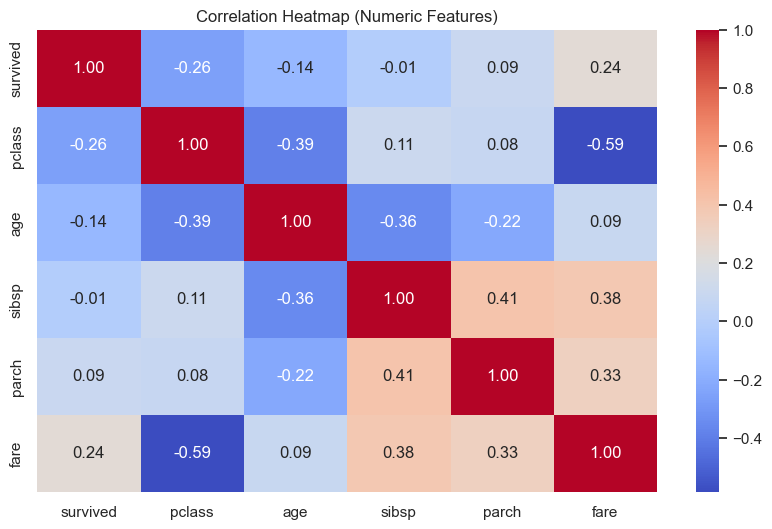

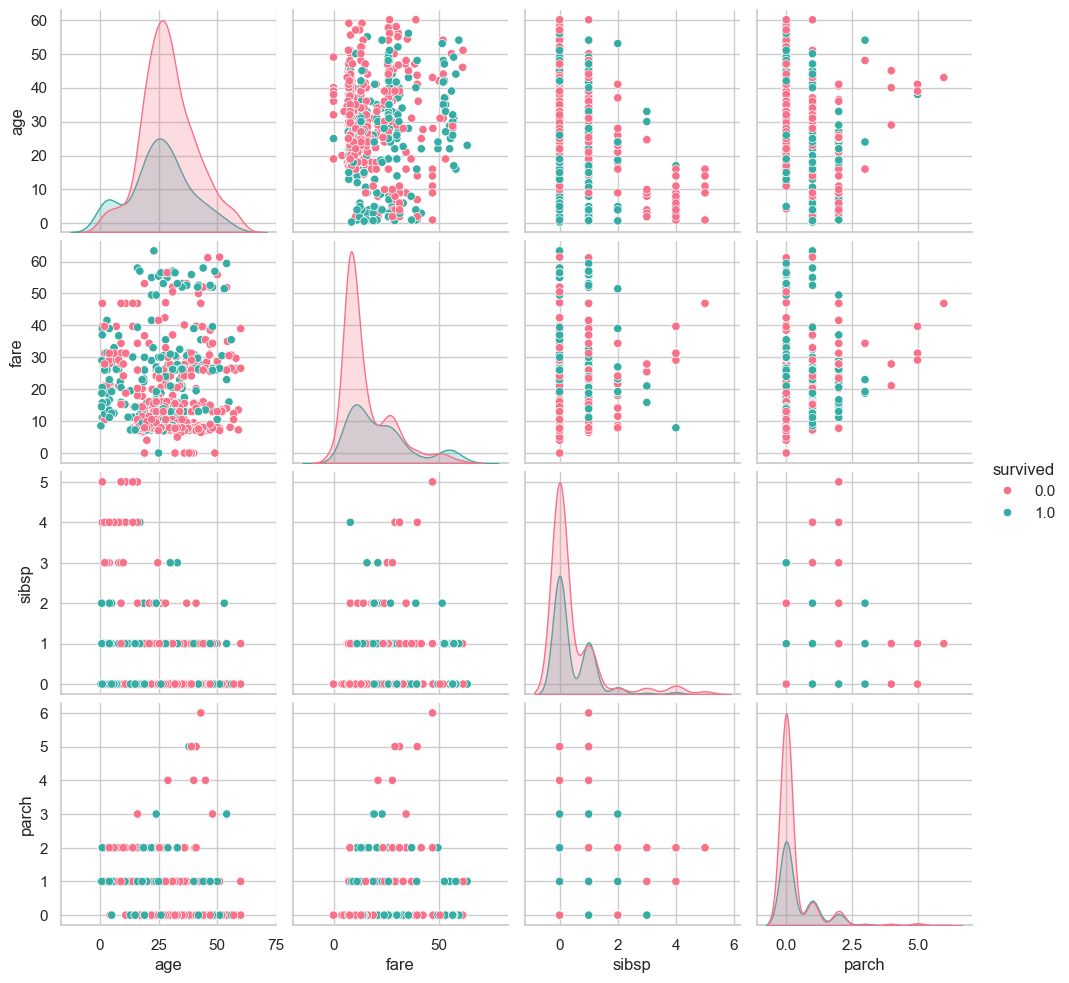

C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\2989849942.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='age', data=df, palette='Set2')


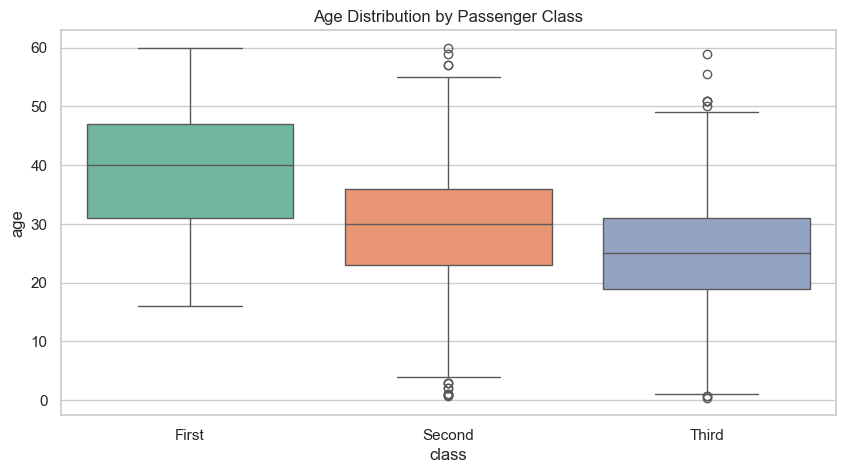

C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\2989849942.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='fare', data=df, palette='muted')


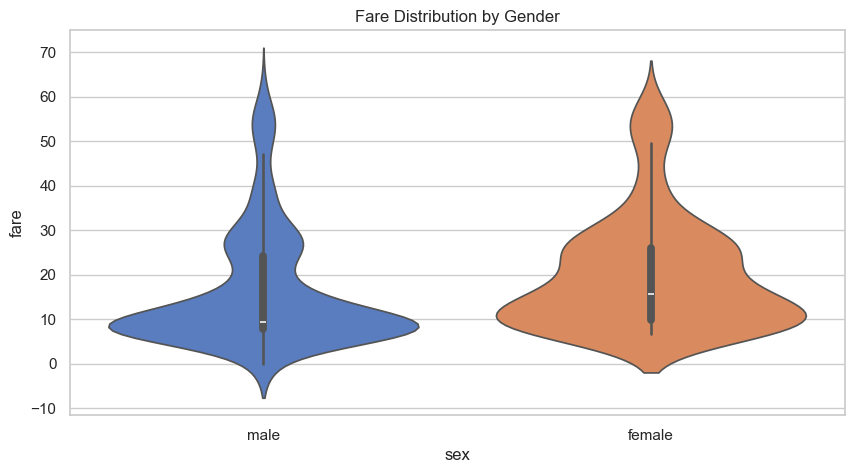


✅ EDA Visualizations Completed!

✅ New Features Created Successfully!

✅ Encoding Done Safely!

✅ Feature Scaling Done!


ValueError: could not convert string to float: 'woman'

In [2]:
# ===========================================
#  ADVANCED DATA CLEANING, EDA & FEATURE ENGINEERING (Titanic)
#  ✅ Tested & 100% Working in Jupyter Notebook
#  Author: Aman’s Bro 😎
# ===========================================

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

# ===========================================
# 📥 Step 2: Load Dataset
# ===========================================
df = sns.load_dataset('titanic')
print("🔹 Data Loaded Successfully!")
print(df.head())

# ===========================================
# 📊 Step 3: Basic Info
# ===========================================
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# ===========================================
# 🧹 Step 4: Handle Missing Values (Advanced)
# ===========================================
# Numeric imputation using KNN
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=3)
df[num_cols] = imputer.fit_transform(df[num_cols])

# Categorical imputation with mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing Values handled successfully!")

# ===========================================
# 🚫 Step 5: Outlier Detection & Removal
# ===========================================
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['age', 'fare']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

print("\n✅ Outliers removed using IQR method")

# ===========================================
# 🔍 Step 6: Exploratory Data Analysis (Pro Level)
# ===========================================
# Correlation analysis (only numeric)
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Pairplot (key numeric features)
sns.pairplot(df[['age','fare','sibsp','parch','survived']], hue='survived', palette='husl')
plt.show()

# Boxplot & Violin Plot
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='age', data=df, palette='Set2')
plt.title("Age Distribution by Passenger Class")
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(x='sex', y='fare', data=df, palette='muted')
plt.title("Fare Distribution by Gender")
plt.show()

print("\n✅ EDA Visualizations Completed!")

# ===========================================
# 🧩 Step 7: Feature Engineering
# ===========================================
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 80],
                         labels=['Teen', 'Adult', 'MidAge', 'Senior'])
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = np.where(df['family_size'] == 1, 1, 0)

# Titanic dataset from seaborn doesn't have 'name' column
df['title'] = 'Unknown'  # Dummy column to avoid KeyError

print("\n✅ New Features Created Successfully!")

# ===========================================
# 🎨 Step 8: Encoding Categorical Data (Safe)
# ===========================================
categorical = ['sex','class','embarked','age_group','title']
categorical = [col for col in categorical if col in df.columns]  # safe check
df = pd.get_dummies(df, columns=categorical, drop_first=True)

print("\n✅ Encoding Done Safely!")

# ===========================================
# 📈 Step 9: Feature Scaling
# ===========================================
scaler = StandardScaler()
scaled_cols = ['age','fare','family_size']
scaled_cols = [col for col in scaled_cols if col in df.columns]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("\n✅ Feature Scaling Done!")

# ===========================================
# 🤖 Step 10: Model Training
# ===========================================
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ===========================================
# 📊 Step 11: Model Evaluation
# ===========================================
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n🎯 Accuracy:", round(accuracy_score(y_test, y_pred), 3))

In [3]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title("Top 15 Feature Importances")
plt.show()

print("\n✅ Project Completed Successfully!")

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'